# Multivariate Data Analysis - Assignment 6
#### Name: Kai Ferragallo-Hawkins
#### Date: 28.4.2024

# Setup - Packages and Imports

In [105]:
# Pandas, package for general data analysis
import pandas as pd
# SKLearn, for label encoding (converting categorical variables to integers)
from sklearn import preprocessing
# Numpy, for general statistical functions
import numpy as np
# MatPlotLib, for general plotting purposes
import matplotlib.pyplot as plt
# Seaborn, for specific plotting purposes
import seaborn as sns
# StepMix, which was used to preform LCA and LPA analysis
from stepmix.stepmix import StepMix
## And for getting mixed analysis
from stepmix.utils import get_mixed_descriptor


# Importing Diamonds Data. Index_col = 0 to handle the 1st column being the index.
diamonds = pd.read_csv("data/diamonds.csv", index_col=0)

# Exercise 6.1 - LCA and LPA
## 6.1.1 - Data Wrangling

I decided to use the diamonds dataframe for LCA and LPA, as it had a good amount of variables (53940) and some categorical and continuous information available. I preprocessed the categories into numerical values, since the package I found (StepMix) only accepts numerical categorical.

In [106]:
# NA Adjustments
## Noting the new differences in NA values
print("Differences in NA values for diamonds dataset:")
print("Number of rows in original DataFrame:", diamonds.shape[0])
print("Number of rows after dropping NA values:", diamonds.dropna().shape[0])

# Changing to continuous
## Adjusting the dataset so that it only has continuous values. Grabs all the indexes that match the selected dtypes from the original dataframe.
diamonds_continuous = diamonds[diamonds.select_dtypes(include=["float64", "int64"]).columns].dropna()
diamonds_categorical = diamonds[diamonds.select_dtypes(include=["object"]).columns]

# Ordering cut for later histograms
diamonds_cut_order = ['Fair', 'Good', "Very Good", 'Premium', "Ideal"]
diamonds_categorical['cut'] = pd.Categorical(diamonds_categorical['cut'], categories=diamonds_cut_order, ordered=True)

## Label encoding the categorical variables to work in LPA
label = preprocessing.LabelEncoder()
for i in diamonds_categorical.columns:
    diamonds_categorical[i+"_encoded"] = label.fit_transform(diamonds_categorical[i])

# Displaying dataframes
print("\nDiamonds Continuous Dataframe")
display(diamonds_continuous)

print("Diamonds Categorical Dataframe")
display(diamonds_categorical)


Differences in NA values for diamonds dataset:
Number of rows in original DataFrame: 53940
Number of rows after dropping NA values: 53940

Diamonds Continuous Dataframe


C:\Users\shad4\AppData\Local\Temp\ipykernel_19348\3177708170.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_categorical['cut'] = pd.Categorical(diamonds_categorical['cut'], categories=diamonds_cut_order, ordered=True)
C:\Users\shad4\AppData\Local\Temp\ipykernel_19348\3177708170.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_categorical[i+"_encoded"] = label.fit_transform(diamonds_categorical[i])
C:\Users\shad4\AppData\Local\Temp\ipykernel_19348\3177708170.py:19: SettingWithCopy

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0.29,62.4,58.0,334,4.20,4.23,2.63
5,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74


Diamonds Categorical Dataframe


,cut,color,clarity,cut_encoded,color_encoded,clarity_encoded
1,Ideal,E,SI2,2,1,3
2,Premium,E,SI1,3,1,2
3,Good,E,VS1,1,1,4
4,Premium,I,VS2,3,5,5
5,Good,J,SI2,1,6,3
...,...,...,...,...,...,...
53936,Ideal,D,SI1,2,0,2
53937,Good,D,SI1,1,0,2
53938,Very Good,D,SI1,4,0,2
53939,Premium,H,SI2,3,4,3


## 6.1.2 - Latent Profile Analysis Modeling
Latent profile analysis works to identify subgroups within populations that share outwards characteristics, and unlike LCA, focuses on continuous data. The package I found that works for it, and LCA, was StepMix (https://pypi.org/project/stepmix/), which has much more depth than I currently understand (i.e. multi iteration clustering for most likely scenarios). The following code makes a model based off of the continuous data in diamonds.

In [107]:
# Gaussian mixture model/Latent profile analysis
## Verbose = 1 gives a detailed description; random_state keeps the results consistent; measurement ensures that 
model = StepMix(n_components=3, measurement="continuous", verbose=1, random_state=123)

# Fit to data
model.fit(diamonds_continuous)

# Making a prediction dataframe 
prediction_dataframe = pd.DataFrame()
prediction_dataframe['continuous_pred'] = model.predict(diamonds_continuous)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.62it/s, max_LL=-7.43e+5, max_avg_LL=-13.8]

MODEL REPORT
    Measurement model parameters
          model_name           gaussian_diag                         
          class_no                         0            1           2
          param       variable                                       
          covariances carat     1.382000e-01       0.0108      0.0026
                      depth     2.686200e+00       2.0639      1.2159
                      price     1.545002e+07  509071.4269  50615.8367
                      table     5.027400e+00       5.2639      4.1122
                      x         4.155000e-01       0.0927      0.0517
                      y         5.567000e-01       0.0935      0.0508
                      z         2.014000e-01       0.0372      0.0200
          means       carat     1.264000e+00       0.6261      0.3416
                      depth     6.181720e+01      61.6947     61.7080
                      price     7.541628e+03    2150.4235    778.8641
                      table     5.795500e+01

# 6.1.3 - Latent Profile Analysis Graphs 
From this, I made two scatter plots comparing Carat with Depth and Price. For Carat and Depth, we can see a very clear alignment of the subgroups along the carat axis, aside from a few outliers from class 1. Interestingly, there is a lot more data in subgroup/class 1 when compared to the 2nd and 3rd. For Carat and Price, there is a lot more blending, and while it may or may not be visible given convsersions to pdf, some green is showing through the purple alongside the 2.5 carat axis. Perhaps some carat ratings may be chosen due to the nicer number (2.5, 3), when those diamonds are better suited to a lower class? 

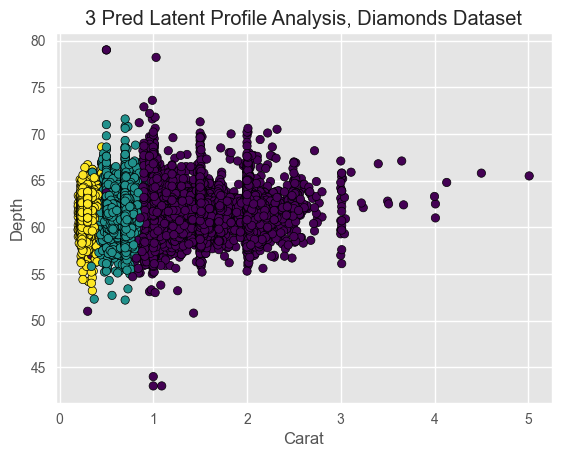

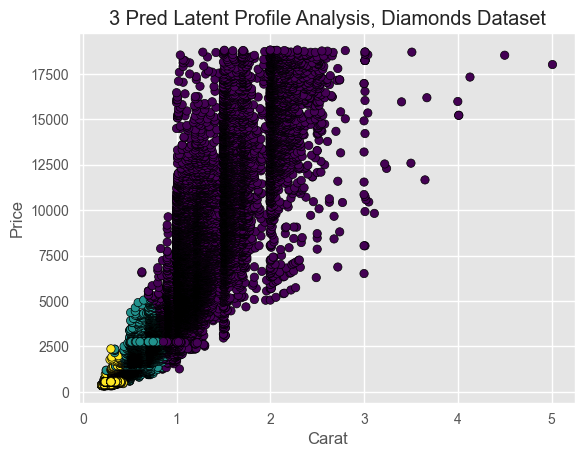

In [108]:
# Latent Profile Analysis Graph #1 - Carat vs Depth
plt.scatter(diamonds_continuous.iloc[:, 0], diamonds_continuous.iloc[:, 1], c=prediction_dataframe['continuous_pred'], edgecolors='k', cmap = "viridis")
plt.title('3 Pred Latent Profile Analysis, Diamonds Dataset')
plt.xlabel('Carat')
plt.ylabel('Depth')
plt.grid(True)
plt.show()

# Latent Profile Analysis Graph #2 - Carat vs Price
plt.scatter(diamonds_continuous.iloc[:, 0], diamonds_continuous.iloc[:, 3], c=prediction_dataframe['continuous_pred'], edgecolors='k', cmap = "viridis")
plt.title('3 Pred Latent Profile Analysis, Diamonds Dataset')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 6.1.4 - Latent Class Analysis Modeling
Next, I preformed latent class analysis, which works for categorical information. The model is shown below.

In [109]:
# Gaussian mixture model/Latent class analysis
## Verbose = 1 gives a detailed description; random_state keeps the results consistent; measurement ensures that 
model = StepMix(n_components=3, measurement="categorical", verbose=1, random_state=123)

# Fit to data
model.fit(diamonds_categorical.iloc[:, 3:5])

# Making a prediction dataframe 
prediction_dataframe['categorical_pred'] = model.predict(diamonds_categorical.iloc[:, 3:5])

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.81s/it, max_LL=-1.75e+5, max_avg_LL=-3.25]

MODEL REPORT
    Measurement model parameters
          model_name            categorical                
          class_no                        0       1       2
          param variable                                   
          pis   color_encoded_0      0.0814  0.1552  0.1396
                color_encoded_1      0.1233  0.2577  0.1642
                color_encoded_2      0.1678  0.1963  0.1670
                color_encoded_3      0.1926  0.1298  0.3024
                color_encoded_4      0.2277  0.1023  0.1329
                color_encoded_5      0.1161  0.0997  0.0863
                color_encoded_6      0.0912  0.0590  0.0077
                cut_encoded_0        0.0642  0.0141  0.0121
                cut_encoded_1        0.0886  0.1425  0.0434
                cut_encoded_2        0.2730  0.3566  0.5630
                cut_encoded_3        0.3616  0.1797  0.2271
                cut_encoded_4        0.2126  0.3072  0.1545
    Class weights
        Class 1 : 0.33
        Class

# 6.1.5 - Latent Class Analysis Graphs
I made two histogram percentage groups, observing how cut and color match up align to each subgroup/class. Class 2 appears overrepresented in the "Ideal" cut, and continuously increases in percentage from "Fair" to "Ideal". This second class also shows for the colors "D" and "G".

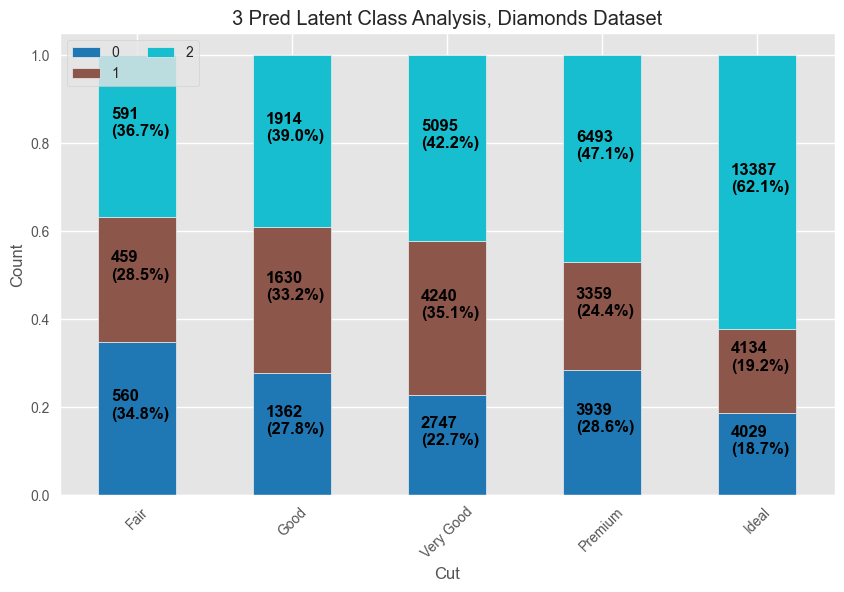

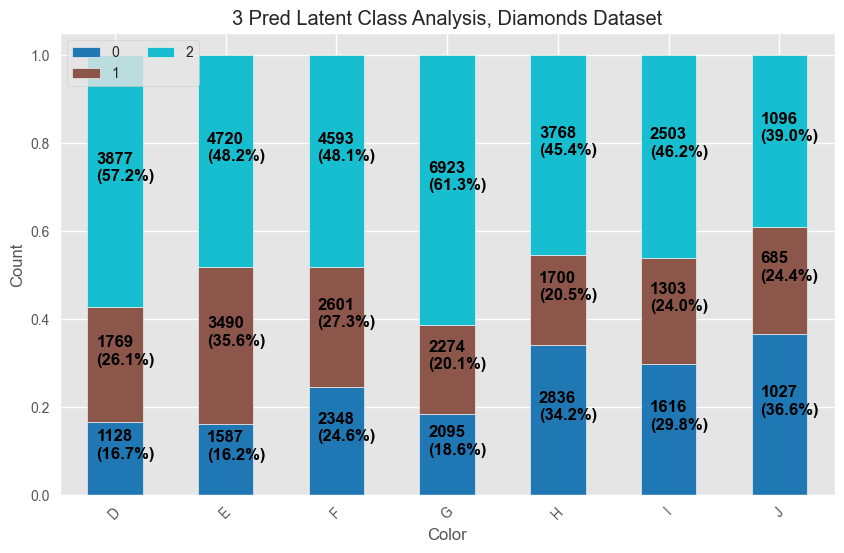

In [110]:
# Latent Class Analysis Graph #1 - Cut Histogram
## Getting the crosstabs, alongside their normalized values, to understand the representation of each categorical variable in each column.
cut_crosstab_norm = pd.crosstab(diamonds_categorical["cut"], prediction_dataframe['categorical_pred'], normalize="index")
cut_crosstab = pd.crosstab(diamonds_categorical["cut"], prediction_dataframe['categorical_pred'])

## Making the plot.
cut_crosstab_norm.plot(kind='bar', stacked=True, cmap='tab10', figsize=(10, 6))
plt.legend(loc="upper left", ncol=2)
plt.title('3 Pred Latent Class Analysis, Diamonds Dataset')
plt.xlabel("Cut")
plt.ylabel("Count")
plt.xticks(rotation=45)

## Adding a legend across the stacked bar plot to show the percentages and values.
for n, x in enumerate([*cut_crosstab.index.values]):
    for (proportion, count, y_loc) in zip(cut_crosstab_norm.loc[x], cut_crosstab.loc[x], cut_crosstab_norm.loc[x].cumsum()):
        
        plt.text(x=n - 0.17, y=(y_loc - proportion) + (proportion / 2), s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=12, fontweight="bold")

plt.show()

# Latent Profile Analysis Graph #2 - Color Histogram
## Getting the crosstabs, alongside their normalized values, to understand the representation of each categorical variable in each column.
color_crosstab_norm = pd.crosstab(diamonds_categorical["color"], prediction_dataframe['categorical_pred'], normalize="index")
color_crosstab = pd.crosstab(diamonds_categorical["color"], prediction_dataframe['categorical_pred'])

## Making the plot.
color_crosstab_norm.plot(kind='bar', stacked=True, cmap='tab10', figsize=(10, 6))
plt.title('3 Pred Latent Class Analysis, Diamonds Dataset')
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)

## Adding a legend across the stacked bar plot to show the percentages and values.
for n, x in enumerate([*color_crosstab.index.values]):
    for (proportion, count, y_loc) in zip(color_crosstab_norm.loc[x], color_crosstab.loc[x], color_crosstab_norm.loc[x].cumsum()):
        
        plt.text(x=n - 0.17, y=(y_loc - proportion) + (proportion / 2), s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=12, fontweight="bold")

plt.show()

# 6.1.6 - Mixed Analysis
The stepmix package can also do a mixed analysis, which I decided to preform below to test out. I ended up using price and cut.

In [118]:
diamonds_mixed = pd.concat([diamonds, diamonds_categorical], axis=1)
mixed_data, mixed_descriptor = get_mixed_descriptor(dataframe = diamonds_mixed, continuous=['price'], categorical=['cut_encoded'])
# Mixed-type mixture model
model = StepMix(n_components=2, measurement=mixed_descriptor, verbose=1, random_state=123)

# Fit model
model.fit(mixed_data)

# Class predictions
prediction_dataframe['mixed_pred'] = model.predict(mixed_data)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.38s/it, max_LL=-5.76e+5, max_avg_LL=-10.7]

MODEL REPORT
    Measurement model parameters
          model_name              continuous             
          class_no                         0            1
          param       variable                           
          covariances price     1.675825e+07  151743.7652
          means       price     5.783120e+03     951.3852


          model_name          categorical        
          class_no                      0       1
          param variable                         
          pis   cut_encoded_0      0.0418  0.0106
                cut_encoded_1      0.1028  0.0718
                cut_encoded_2      0.3372  0.5000
                cut_encoded_3      0.2803  0.2161
                cut_encoded_4      0.2379  0.2015


    Class weights
        Class 1 : 0.62
        Class 2 : 0.38
    Fit for 2 latent classes
    Estimation method             : 1-step
    Number of observations        : 53940
    Number of latent classes      : 2
    Number of estimated parameters: 13
    L

# 6.1.7 - Mixed Analysis Graph
The following graph is a two prediction box plot of the price vs the color. When using all the data and two categories, there does not appear to be a clear trend from an "Ideal" to "Fair" diamond, though it does appear that a greater range of prices exists for the better cut diamonds.

C:\Users\shad4\AppData\Local\Temp\ipykernel_19348\3056109590.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x=diamonds["cut"], y=diamonds["price"], hue=prediction_dataframe["mixed_pred"],


Text(0, 0.5, 'Price')

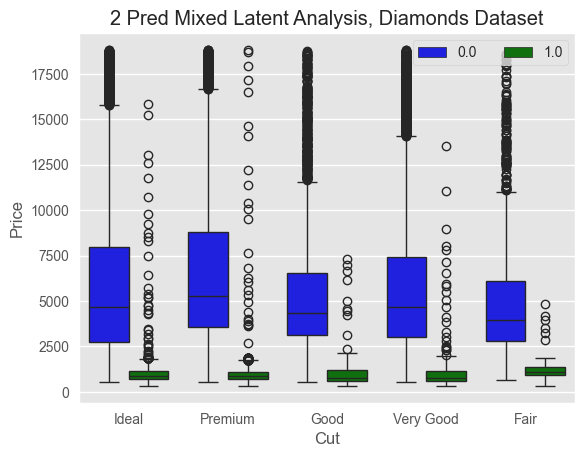

In [120]:
# Making Graph
sns.boxplot(x=diamonds["cut"], y=diamonds["price"], hue=prediction_dataframe["mixed_pred"],
    palette=['blue', 'green', 'red'])
plt.legend(loc="upper right", ncol=2)
plt.title('2 Pred Mixed Latent Analysis, Diamonds Dataset')
plt.xlabel("Cut")
plt.ylabel("Price")

# 6.1.8 - Potential Future Code?
When researching, I found what was a very neat prediction graph, which modeled how often the different values were placed into their classes using sklearn. Sadly, I could not get it to work, even when directly using the sample code (likely affected by version changes). I showed what the graph should look like for the example data below, and included the code for my own future reference.

In [113]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

from stepmix.stepmix import StepMixClassifier
from stepmix.datasets import data_gaussian_binary, data_gaussian_categorical

cm = ListedColormap(["#a24253", "#629ac6"])
cm_bg = plt.cm.RdBu

# Generate and visualize data
# This dataset has two input features and two binary targets
X, Y, _ = data_gaussian_binary(n_samples=500, random_state=42)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

# Fit StepMix
clf = StepMixClassifier(n_components=4, measurement='gaussian_full', structural='binary', random_state=42, verbose=1, progress_bar=0)
clf.fit(X_train, Y_train)

# Check accuracy on test set
preds_test = clf.predict(X_test)

print(f'\nTest Accuracy Target 1: {accuracy_score(Y_test[:, 0], preds_test[:, 0]):.4f}')
print(f'Test Accuracy Target 2: {accuracy_score(Y_test[:, 1], preds_test[:, 1]):.4f}')

preds = clf.predict(X)

# DecisionBoundaryDisplay.from_estimator(
#      clf, X, cmap=cm_bg, alpha=0.8, eps=0.5
# )
# plt.scatter(
#     X[:, 0], X[:, 1], c=preds[:, 0], cmap=cm, edgecolors="k"
# )

MODEL REPORT
    Measurement model parameters
          model_name             gaussian_full          
          variable                   feature_0 feature_1
          class_no param                                
          0        cov_feature_0        0.9117    0.1361
                   cov_feature_1        0.1361    1.6870
                   means                3.9737   -3.7510
          1        cov_feature_0        2.2842    0.2211
                   cov_feature_1        0.2211    2.4674
                   means               -2.3676    4.0352
          2        cov_feature_0        5.9838    5.4842
                   cov_feature_1        5.4842    5.4161
                   means               -3.1335   -3.5372
          3        cov_feature_0        0.2403    0.1227
                   cov_feature_1        0.1227   10.4700
                   means                4.0078    3.9249
    Structural model parameters
          model_name       binary                        
         

ValueError: StepMixClassifier should either be a classifier to be used with response_method=['decision_function', 'predict_proba', 'predict'] or the response_method should be 'predict'. Got a regressor with response_method=['decision_function', 'predict_proba', 'predict'] instead.

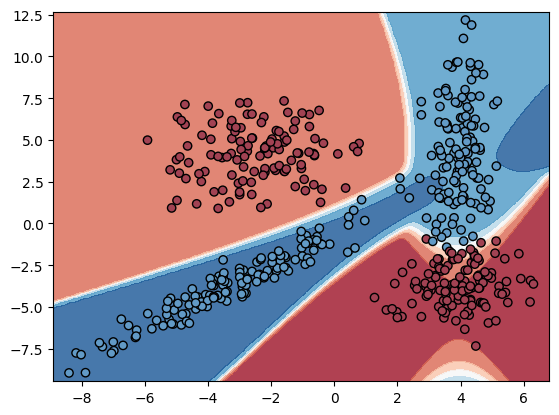

In [121]:
from IPython.display import Image, display
display(Image(filename="data/exampleimage.png"))